# Data Exploration

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#store the url in a variable
url = "train_data.csv"
url_test = "test_data.csv"

In [2]:
# # Read in the data with `read_csv()`
# #dataset = pd.read_csv(url)
# test_dataset = pd.read_csv("test_data.csv")

In [3]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
#Preprocess Merge Red and White
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 2

# Append `white` to `red`
wines = red.append(white, ignore_index=True)
dataset = wines

In [5]:
dataset.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,2


In [6]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
# Using .head() method to view the first few records of the data set
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
# Using head() method with an argument which helps us to restrict the number of initial records that should be displayed
dataset.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
# Using .tail() method to view the last few records from the dataframe
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,2


In [10]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,1.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


In [11]:
# using the dtypes() method to display the different datatypes available
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object

In [12]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

# Data Visualization

<Figure size 432x288 with 0 Axes>

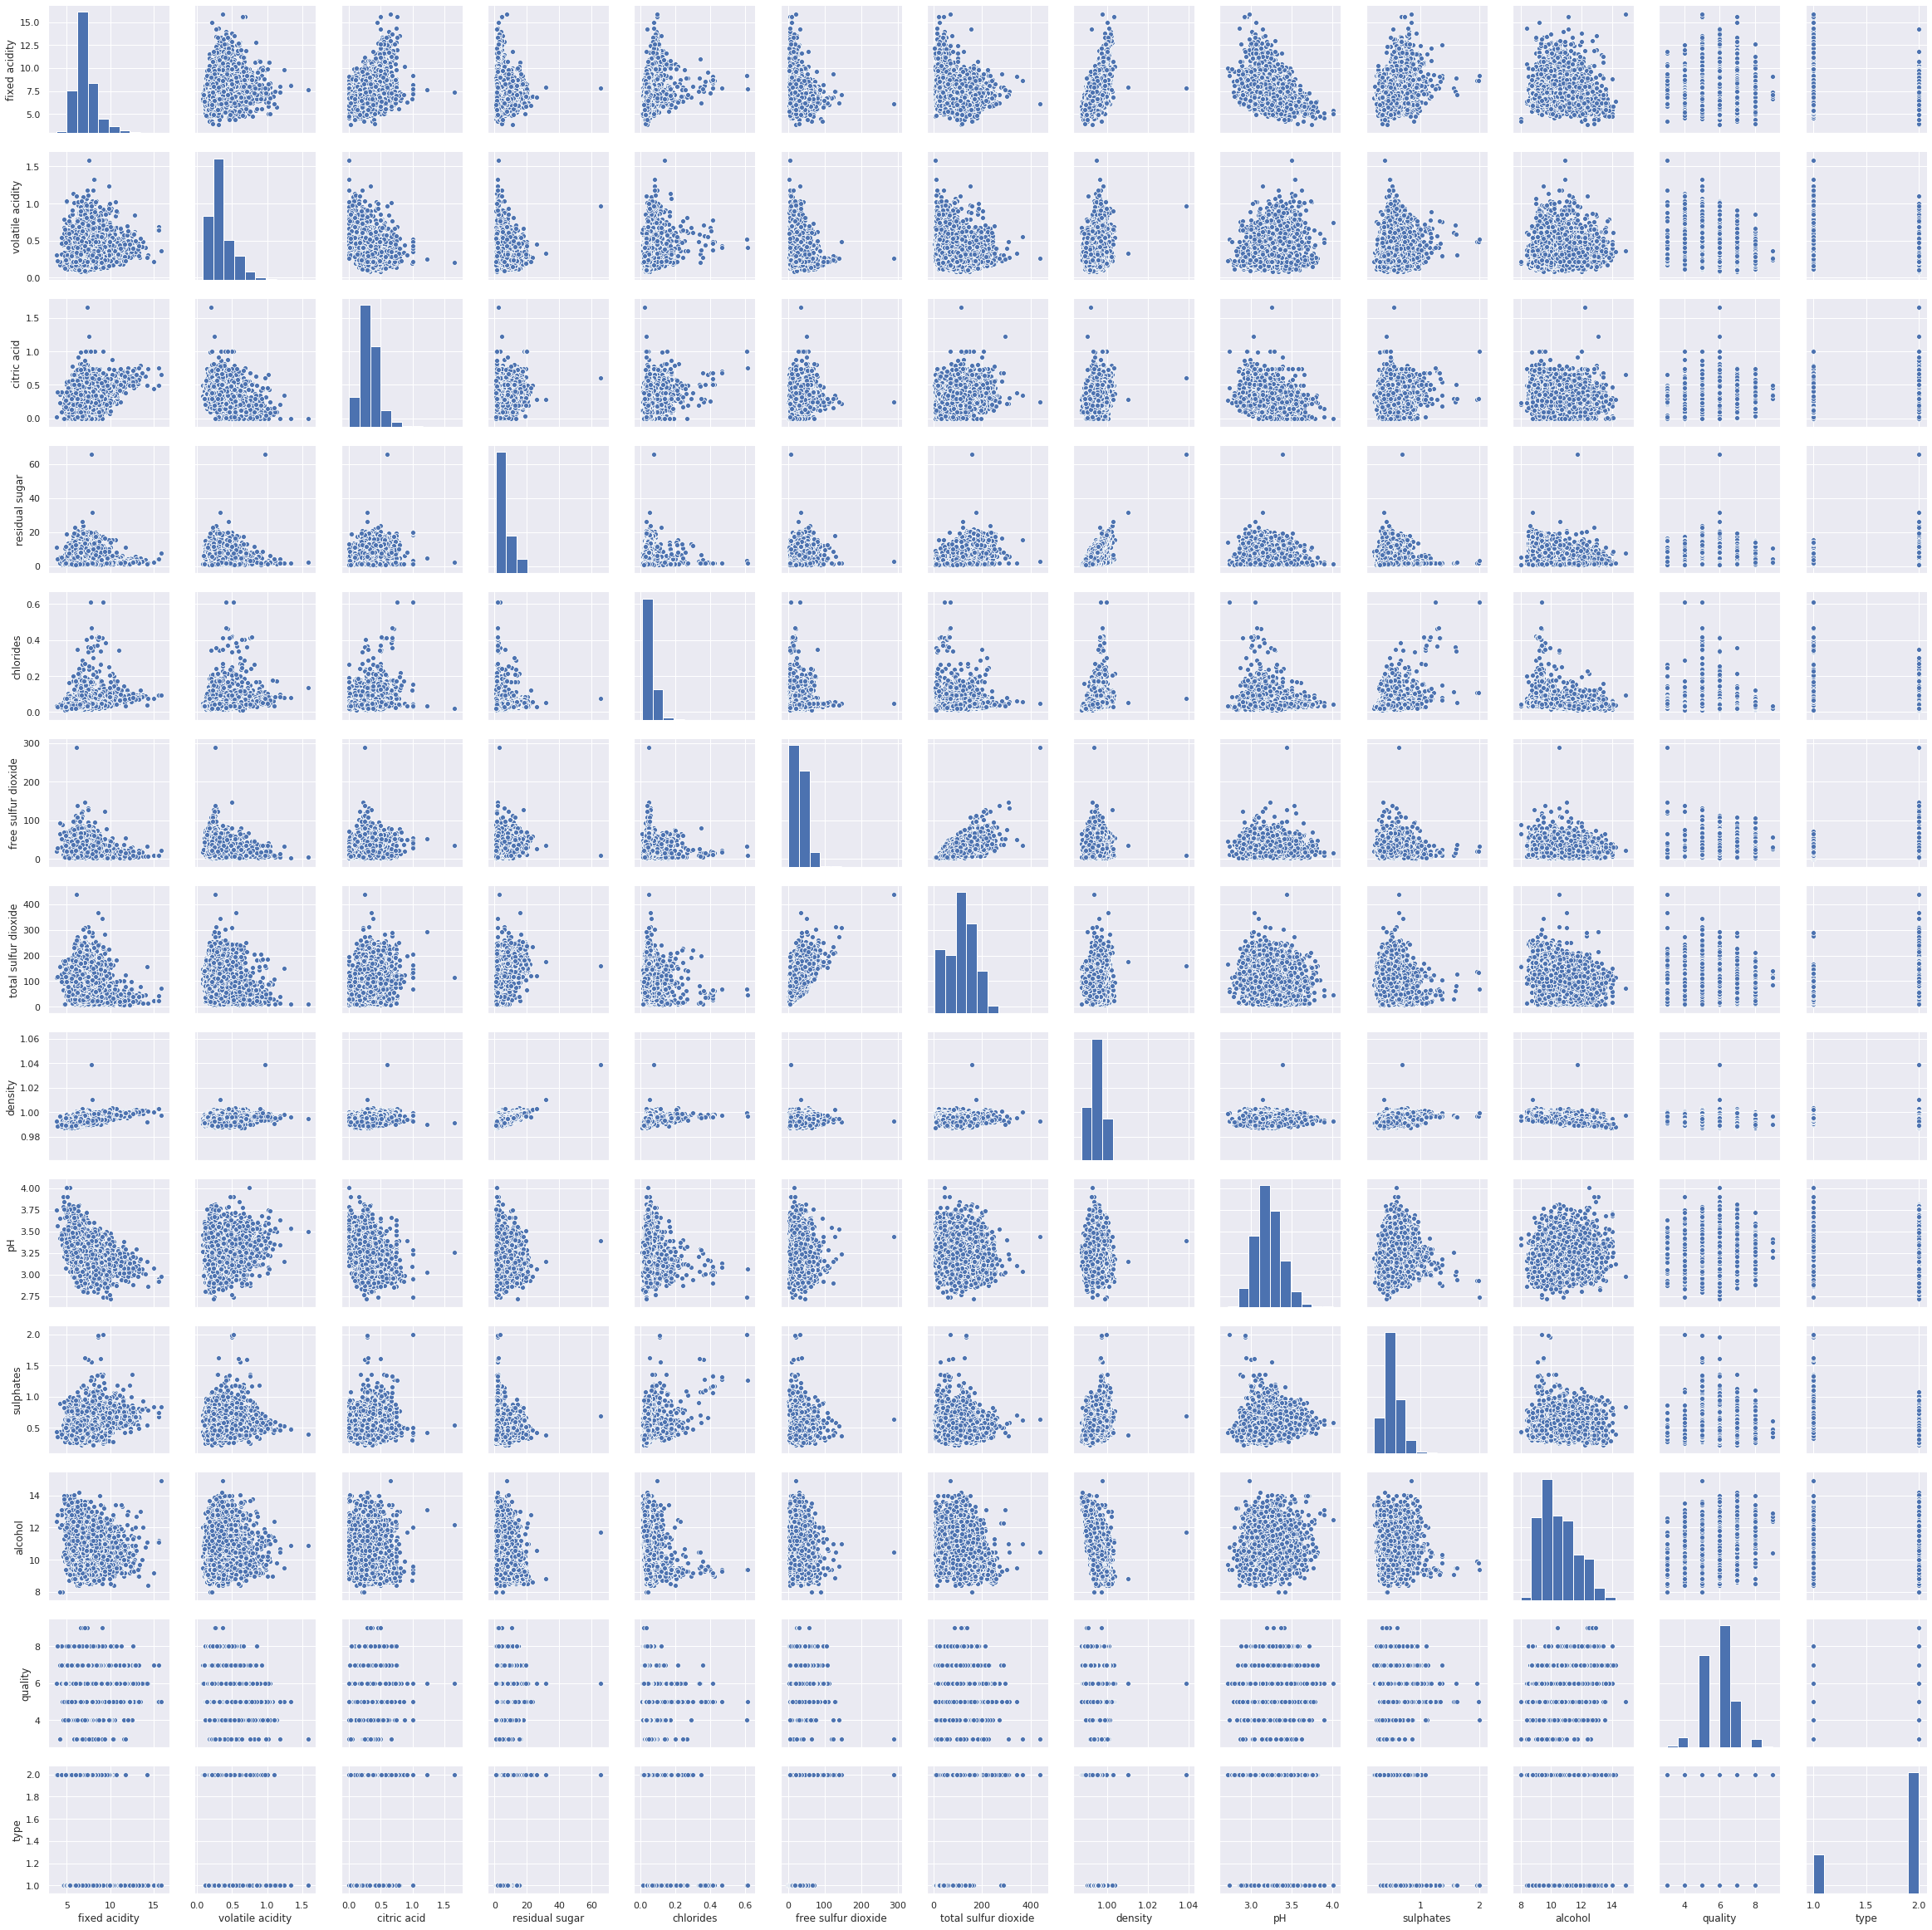

In [13]:
#Check correleation between the variables using Seaborn's pairplot. 
fig = plt.figure()
sns.set()
sns_plot = sns.pairplot(dataset)
sns_plot.savefig("pairplot_correlation.png")

In [ ]:
correlation = dataset.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
heatmap.figure.savefig("heatmap.png")

In [ ]:
# import the seaborn module
#import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a countplot 
sns_plot = sns.countplot('type',data=dataset,hue = 'quality')

# Remove the top and down margin
sns.despine(offset=10, trim=True)

sns_plot.figure.savefig("quality_coun_plot.png")
# display the plotplt.show()

In [ ]:
# import the seaborn module
#import seaborn as sns

# import the matplotlib module
import matplotlib.pyplot as plt

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(16.7,13.27)})
dataset.tail(n=2)

In [ ]:
# plotting the violinplot
sns_plot = sns.violinplot(x="quality",y="fixed acidity", hue="quality", data=dataset);
plt.show()
sns_plot.figure.savefig("fixed_acidity_quality_violinplot.png")

In [ ]:
#count of each target variable
from collections import Counter
Counter(dataset['quality'])

In [ ]:
#count of the target variable
sns_plot = sns.countplot(x='quality', data=dataset)
sns_plot.figure.savefig("qualty count bothtypes countplot.png")

In [ ]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns_plot = sns.boxplot('quality', 'fixed acidity', data = dataset)
sns_plot.figure.savefig("fixed acidity quality boxplot.png")

In [ ]:
sns.boxplot('quality', 'volatile acidity', data = dataset)

In [ ]:
sns.boxplot('quality', 'citric acid', data = dataset)

In [ ]:
sns_plot = sns.boxplot('quality', 'residual sugar', data = dataset)
sns_plot.figure.savefig("residual sugar quality boxplot.png")

In [ ]:
sns.boxplot('quality', 'chlorides', data = dataset)

In [ ]:
sns.boxplot('quality', 'free sulfur dioxide', data = dataset)

In [ ]:
sns.boxplot('quality', 'total sulfur dioxide', data = dataset)

In [ ]:
sns_plot = sns.boxplot('quality', 'density', data = dataset)
sns_plot.figure.savefig("density quality boxplot.png")

In [ ]:
sns.boxplot('quality', 'pH', data = dataset)

In [ ]:
sns.boxplot('quality', 'sulphates', data = dataset)

In [ ]:
sns.boxplot('quality', 'alcohol', data = dataset)

In [14]:
dataset = wines

In [15]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,2


In [17]:

Q1 = dataset['sulphates'].quantile(0.1)
Q3 = dataset['sulphates'].quantile(0.95)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

0.37
0.79
0.42000000000000004


In [18]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.30000
volatile acidity         0.17000
citric acid              0.14000
residual sugar           6.30000
chlorides                0.02700
free sulfur dioxide     24.00000
total sulfur dioxide    79.00000
density                  0.00465
pH                       0.21000
sulphates                0.17000
alcohol                  1.80000
quality                  1.00000
type                     0.00000
dtype: float64


In [19]:
datasetout = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
datasetout.shape
dataset=datasetout

In [20]:
# For each feature find the data points with extreme high or low values
data= dataset
for feature in data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=20)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=70)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
 
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2150,9.2,0.25,0.34,1.2,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7,2
2154,9.2,0.25,0.34,1.2,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7,2
2255,9.0,0.27,0.35,4.9,0.028,27.0,95.0,0.99320,3.04,0.40,11.3,6,2
2331,8.8,0.28,0.45,6.0,0.022,14.0,49.0,0.99340,3.01,0.33,11.1,7,2
2446,9.2,0.34,0.27,1.2,0.026,17.0,73.0,0.99210,3.08,0.39,10.8,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,2
5013,8.9,0.30,0.35,4.6,0.032,32.0,148.0,0.99458,3.15,0.45,11.5,7,2
5125,8.9,0.27,0.28,0.8,0.024,29.0,128.0,0.98984,3.01,0.35,12.4,6,2
6117,9.0,0.20,0.33,3.5,0.049,10.0,40.0,0.99440,3.14,0.36,9.8,6,2


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6,2
1661,7.0,0.470,0.07,1.1,0.035,17.0,151.0,0.99100,3.02,0.34,10.50,5,2
1678,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.00,5,2
1746,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.00,4,2
1771,7.6,0.480,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.40,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,2
6435,6.7,0.500,0.36,11.5,0.096,18.0,92.0,0.99642,3.11,0.49,9.60,5,2
6459,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.00,6,2
6466,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.00,6,2


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1615,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6,2
1661,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.50,5,2
1709,6.5,0.17,0.54,8.50,0.082,64.0,163.0,0.99590,2.89,0.39,8.80,6,2
1719,5.9,0.36,0.04,5.70,0.046,21.0,87.0,0.99340,3.22,0.51,10.20,5,2
1727,6.1,0.30,0.56,2.80,0.044,47.0,179.0,0.99240,3.30,0.57,10.90,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,7.9,0.30,0.60,1.85,0.048,13.0,106.0,0.99331,3.24,0.49,11.85,5,2
6379,5.8,0.30,0.09,6.30,0.042,36.0,138.0,0.99382,3.15,0.48,9.70,5,2
6380,5.6,0.30,0.10,6.40,0.043,34.0,142.0,0.99382,3.14,0.48,9.80,5,2
6405,6.6,0.28,0.09,10.90,0.051,37.0,131.0,0.99566,2.93,0.62,9.50,6,2


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1634,7.3,0.280,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.8,5,2
1659,6.8,0.220,0.24,4.9,0.092,30.0,123.0,0.99510,3.03,0.46,8.6,6,2
1709,6.5,0.170,0.54,8.5,0.082,64.0,163.0,0.99590,2.89,0.39,8.8,6,2
1723,6.4,0.130,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6,2
1951,5.5,0.335,0.30,2.5,0.071,27.0,128.0,0.99240,3.14,0.51,9.6,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,4.8,0.225,0.38,1.2,0.074,47.0,130.0,0.99132,3.31,0.40,10.3,6,2
6374,5.0,0.270,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,6,2
6375,5.8,0.270,0.40,1.2,0.076,47.0,130.0,0.99185,3.13,0.45,10.3,6,2
6410,7.0,0.170,0.42,1.0,0.075,19.0,71.0,0.99103,3.32,0.62,11.4,6,2


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1946,6.7,0.19,0.41,15.6,0.056,75.0,155.0,0.99950,3.20,0.44,8.8,6,2
2591,6.5,0.25,0.27,15.2,0.049,75.0,217.0,0.99720,3.19,0.39,9.9,5,2
3574,6.8,0.27,0.35,7.8,0.048,76.0,197.0,0.99590,3.24,0.43,9.5,6,2
3798,6.6,0.25,0.42,11.3,0.049,77.0,231.0,0.99660,3.24,0.52,9.5,6,2
4175,6.5,0.27,0.40,10.0,0.039,74.0,227.0,0.99582,3.18,0.50,9.4,5,2
4476,6.5,0.15,0.55,5.9,0.045,75.0,162.0,0.99482,2.97,0.40,9.3,5,2
4588,6.2,0.16,0.32,1.1,0.036,74.0,184.0,0.99096,3.22,0.41,11.0,6,2
4605,6.2,0.16,0.32,1.1,0.036,74.0,184.0,0.99096,3.22,0.41,11.0,6,2
5109,7.0,0.22,0.24,11.0,0.041,75.0,167.0,0.99508,2.98,0.56,10.5,6,2
5469,6.1,0.23,0.27,9.8,0.055,74.0,134.0,0.99534,3.16,0.40,10.2,6,2


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1624,7.0,0.25,0.32,9.0,0.046,56.0,245.0,0.99550,3.25,0.50,10.4,6,2
1669,6.2,0.27,0.43,7.8,0.056,48.0,244.0,0.99560,3.10,0.51,9.0,6,2
1826,7.1,0.25,0.32,10.3,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6,2
1844,6.1,0.18,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.3,6,2
1953,5.8,0.40,0.42,4.4,0.047,38.5,245.0,0.99370,3.25,0.57,9.6,6,2
2042,6.6,0.52,0.44,12.2,0.048,54.0,245.0,0.99750,3.26,0.54,9.3,6,2
2345,7.0,0.21,0.34,8.5,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6,2
2352,7.0,0.21,0.34,8.5,0.033,31.0,253.0,0.99530,3.22,0.56,10.5,6,2
2407,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.99760,3.15,0.38,9.0,6,2
2537,6.2,0.35,0.29,7.3,0.044,56.0,244.0,0.99560,3.36,0.55,10.0,6,2


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3849,9.2,0.34,0.54,17.3,0.06,46.0,235.0,1.00182,3.08,0.61,8.8,6,2


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1612,6.6,0.160,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40,7,2
1918,6.1,0.125,0.25,3.3,0.040,10.0,69.0,0.99340,3.54,0.59,10.10,6,2
1919,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.99270,3.61,0.61,10.30,7,2
2045,5.8,0.280,0.27,2.6,0.054,30.0,156.0,0.99140,3.53,0.42,12.40,5,2
2128,5.6,0.190,0.47,4.5,0.030,19.0,112.0,0.99220,3.56,0.45,11.20,6,2
2491,5.9,0.260,0.30,1.0,0.036,38.0,114.0,0.99280,3.58,0.48,9.40,5,2
2519,7.0,0.110,0.32,4.6,0.057,59.0,144.0,0.99560,3.55,0.44,9.40,7,2
2527,6.5,0.250,0.35,12.0,0.055,47.0,179.0,0.99800,3.58,0.47,10.00,5,2
2541,5.4,0.415,0.19,1.6,0.039,27.0,88.0,0.99265,3.54,0.41,10.00,7,2
2719,6.7,0.105,0.32,12.4,0.051,34.0,106.0,0.99800,3.54,0.45,9.20,6,2


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1679,6.8,0.22,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.6,6,2
1753,8.2,0.23,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.7,6,2
1808,6.1,0.40,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.5,6,2
1844,6.1,0.18,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.3,6,2
1938,6.6,0.18,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,7.3,0.22,0.37,15.5,0.048,70.0,203.0,0.99899,3.25,0.77,9.4,5,2
6216,5.2,0.50,0.18,2.0,0.036,23.0,129.0,0.98949,3.36,0.77,13.4,7,2
6352,5.5,0.16,0.26,1.5,0.032,35.0,100.0,0.99076,3.43,0.77,12.0,6,2
6426,6.7,0.22,0.33,1.2,0.036,36.0,86.0,0.99058,3.10,0.76,11.4,6,2


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2300,5.9,0.340,0.22,2.4,0.030,19.0,135.0,0.98940,3.41,0.78,13.9,7,2
2698,5.8,0.290,0.21,2.6,0.025,12.0,120.0,0.98940,3.39,0.79,14.0,7,2
4749,5.8,0.390,0.47,7.5,0.027,12.0,88.0,0.99070,3.38,0.45,14.0,6,2
5057,5.8,0.320,0.20,2.6,0.027,17.0,123.0,0.98936,3.36,0.78,13.9,7,2
5503,5.0,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7,2
5514,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.0,7,2
5748,5.8,0.240,0.28,1.4,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,7,2


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


Data points considered outliers for the feature 'type':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


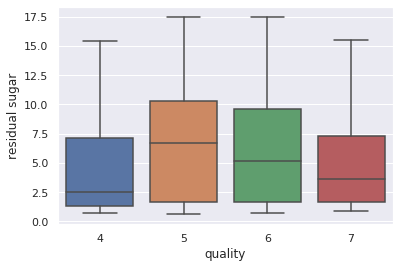

In [21]:
sns_plot = sns.boxplot('quality', 'residual sugar', data = dataset)
sns_plot.figure.savefig("residual sugar quality clean boxplot.png")

In [22]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening
dataset.describe()
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.0
mean,6.851696,0.272113,0.323184,6.069180,0.043088,34.253968,136.889370,0.993849,3.189577,0.486558,10.552524,5.848244,2.0
std,0.801561,0.089565,0.093105,4.634705,0.011456,15.087977,41.429235,0.002778,0.142849,0.105916,1.192063,0.770711,0.0
min,4.700000,0.080000,0.040000,0.600000,0.009000,2.000000,10.000000,0.987110,2.800000,0.220000,8.400000,4.000000,2.0
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991680,3.090000,0.410000,9.500000,5.000000,2.0
50%,6.800000,0.260000,0.310000,5.000000,0.043000,33.000000,133.000000,0.993620,3.180000,0.470000,10.400000,6.000000,2.0
75%,7.300000,0.320000,0.370000,9.200000,0.050000,45.000000,166.000000,0.995810,3.280000,0.550000,11.400000,6.000000,2.0
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,3.630000,0.850000,14.000000,7.000000,2.0


# Preprocessing Data

In [23]:
# Using .tail() method to view the last few records from the dataframe
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.0
mean,6.851696,0.272113,0.323184,6.069180,0.043088,34.253968,136.889370,0.993849,3.189577,0.486558,10.552524,5.848244,2.0
std,0.801561,0.089565,0.093105,4.634705,0.011456,15.087977,41.429235,0.002778,0.142849,0.105916,1.192063,0.770711,0.0
min,4.700000,0.080000,0.040000,0.600000,0.009000,2.000000,10.000000,0.987110,2.800000,0.220000,8.400000,4.000000,2.0
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991680,3.090000,0.410000,9.500000,5.000000,2.0
50%,6.800000,0.260000,0.310000,5.000000,0.043000,33.000000,133.000000,0.993620,3.180000,0.470000,10.400000,6.000000,2.0
75%,7.300000,0.320000,0.370000,9.200000,0.050000,45.000000,166.000000,0.995810,3.280000,0.550000,11.400000,6.000000,2.0
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,3.630000,0.850000,14.000000,7.000000,2.0


In [24]:
print("type' : ",dataset['type'].unique())
print("fixed acidity : ",dataset['fixed acidity'].unique())
print("alcohol : ",dataset['alcohol'].unique())
print("pH : ",dataset['pH'].unique())
print("free sulfur dioxide : ",dataset['free sulfur dioxide'].unique())

type' :  [2]
fixed acidity :  [6.3  8.1  7.2  6.2  8.6  7.9  6.6  7.4  6.5  6.4  7.   6.9  8.5  8.3
 5.8  7.3  6.7  6.   6.8  7.1  6.1  7.5  5.9  7.8  5.7  8.2  5.6  7.6
 8.4  7.7  5.3  5.4  5.2  8.   5.5  5.1  5.   9.2  9.   8.8  8.7  9.4
 9.6  9.3  9.1  8.9  9.5  6.15 6.45 4.8  4.7  4.9 ]
alcohol :  [ 9.5        10.1         9.9         9.6        11.         12.
  9.7        10.8        12.4        11.4        11.3        10.
 10.4        10.5        11.6        12.3        10.2         9.
 12.8        11.2         9.8        11.7        10.9         8.9
  8.6        10.3        12.6         9.1        12.7         9.3
 10.6         9.2        11.5         9.4         8.8        11.8
 10.7        11.1         8.7        11.9        12.5        12.2
 12.9        12.1        13.9        14.         13.5        13.3
 13.2        13.4        13.          8.5        13.1        13.7
 13.6         8.4        11.94       12.89333333 11.46666667 10.98
 10.03333333 11.43333333 10.53333333  9

In [25]:
#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#display the initial records
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
1602,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
1603,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
1604,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2


In [26]:
# using the dtypes() method to display the different datatypes available
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object

# Training Set & Test Set

In [27]:
# select columns other than 'POST-OPERATION-RISK'

#cols = [col for col in dataset.columns if col not in ['quality','citric acid','residual sugar','chlorides','density','pH','sulphates','alcohol','type']]
cols = [col for col in dataset.columns if col not in ['quality']]
#cols = [col for col in dataset.columns if col not in ['quality','residual sugar','density']]

#Attaching Quality and Type Column into Target Variable
cols_all_target = [col for col in dataset.columns if col not in ['fixed acidity','volatile acidity',
                                                                 'free sulfur dioxide','total sulfur dioxide',
                                                                 'citric acid','residual sugar','chlorides',
                                                                 'density','pH','sulphates','alcohol']]

# dropping the 'POST-OPERATION-RISK' columns
data = dataset[cols]

#assigning the POST-OPERATION-RISK column as target
target = dataset['quality']

target_all = dataset[cols_all_target]

data.head(n=2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
1601,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2


In [28]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,2


In [29]:
target1 = target_all
target2 = target_all

target1 = target1[(target1['type']==1)]
target2 = target2[(target2['type']==2)]
target1 = target1['quality']
target2 = target2['quality']

In [30]:
data1 = data
data2 = data

data1 = data1[(data1['type']==1)]
data2 = data2[(data2['type']==2)]

In [31]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#import the necessary module
from sklearn.model_selection import train_test_split

#split data set into train and test sets 
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, random_state = 10)

In [33]:
#split data set into train and test sets 
data_train1, data_test1, target_train1, target_test1 = train_test_split(red.drop(columns=['quality']),red[['type', 'quality']], test_size = 0.25, random_state = 10)

In [34]:
#split data set into train and test sets 
data_train2, data_test2, target_train2, target_test2 = train_test_split(white.drop(columns=['quality']),white[['type', 'quality']], test_size = 0.25, random_state = 10)



In [35]:
data_test2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1838,6.5,0.34,0.36,11.0,0.052,53.0,247.0,0.99840,3.44,0.55,9.3,2
2562,6.9,0.32,0.26,2.3,0.030,11.0,103.0,0.99106,3.06,0.42,11.1,2
3869,6.2,0.22,0.30,12.4,0.054,108.0,152.0,0.99728,3.10,0.47,9.5,2
2149,6.8,0.24,0.34,5.1,0.038,31.0,99.0,0.99210,3.24,0.46,11.8,2
163,7.4,0.24,0.42,14.0,0.066,48.0,198.0,0.99790,2.89,0.42,8.9,2


In [36]:
from sklearn.metrics import accuracy_score


# Building The Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
## Scores Without Scaling
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report


clf = RandomForestClassifier(n_estimators=1000, random_state=100)
clf.fit(data_train,target_train)
pred=clf.predict(data_test)




In [58]:
#### Confusion matrix
from sklearn.metrics import confusion_matrix


def results(target_test, pred):
    print("Random Forest Accuracy Score: ",accuracy_score(target_test,pred, normalize = True))
    #Checking the accuracy 
    r = r2_score(target_test, pred)
    print("------Results for Random Forest-----")
    print("1.....R score:  ",r)

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (mae / target_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('......Accuracy:', round(accuracy, 2), '%.')


    #giving report of falsepositive and false negative
    matrics1=confusion_matrix(target_test,target_test)
    matrics2=confusion_matrix(target_test,pred)
    print("========Confusion MAtrics for test set===========")
    print(matrics1)
    print("========Confusion MAtrics for target set===========")
    print(matrics2)

    #classification report tells the accuracy of the model
    classification_result=classification_report(target_test,pred)
    print("=========Classification Report======")
    print(classification_result)
    print('\n')

    accuracy=accuracy_score(target_test,pred)
    print("=========accuracy=========")
    print(accuracy)
    print('\n')


Random Forest Accuracy Score:  0.6778846153846154
------Results for Random Forest-----
1.....R score:   0.38312718046305116
......Accuracy: 94.09 %.
========Confusion MAtrics for test set===========
[[ 31   0   0   0]
 [  0 312   0   0]
 [  0   0 479   0]
 [  0   0   0 218]]
========Confusion MAtrics for target set===========
[[  4  18   9   0]
 [  0 198 110   4]
 [  1  65 386  27]
 [  0   4  97 117]]
=========Classification Report======
              precision    recall  f1-score   support

           4       0.80      0.13      0.22        31
           5       0.69      0.63      0.66       312
           6       0.64      0.81      0.71       479
           7       0.79      0.54      0.64       218

    accuracy                           0.68      1040
   macro avg       0.73      0.53      0.56      1040
weighted avg       0.69      0.68      0.67      1040



=========accuracy=========
0.6778846153846154




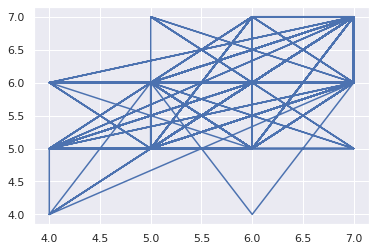

In [57]:
results(target_test, pred)

plt.plot(target_test,pred)


In [66]:
#SCORES WITH SCALING
from sklearn.metrics import accuracy_score

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(data_train)

# Scale the train set
X_train = scaler.fit_transform(data_train)

# Scale the test set
X_test = scaler.transform(data_test)


#-------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


clf = RandomForestClassifier(n_estimators=1000, random_state=100)
clf.fit(X_train,target_train)
pred=clf.predict(X_test)

#Results
results(target_test, pred)


Random Forest Accuracy Score:  0.6788461538461539
------Results for Random Forest-----
1.....R score:   0.38471297177291486
......Accuracy: 94.12 %.
========Confusion MAtrics for test set===========
[[ 31   0   0   0]
 [  0 312   0   0]
 [  0   0 479   0]
 [  0   0   0 218]]
========Confusion MAtrics for target set===========
[[  4  18   9   0]
 [  0 197 111   4]
 [  1  64 388  26]
 [  0   4  97 117]]
=========Classification Report======
              precision    recall  f1-score   support

           4       0.80      0.13      0.22        31
           5       0.70      0.63      0.66       312
           6       0.64      0.81      0.72       479
           7       0.80      0.54      0.64       218

    accuracy                           0.68      1040
   macro avg       0.73      0.53      0.56      1040
weighted avg       0.69      0.68      0.67      1040



=========accuracy=========
0.6788461538461539




In [67]:
#### Scaling Min MAx
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
## Scores
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(data_train)

clf = RandomForestClassifier(n_estimators=1000, random_state=100)
clf.fit(X_train_scaled,target_train)

X_test_scaled = scaler.transform(data_test)

pred=clf.predict(X_test_scaled)


#Results
results(target_test, pred)


Random Forest Accuracy Score:  0.6798076923076923
------Results for Random Forest-----
1.....R score:   0.38629876308277844
......Accuracy: 94.12 %.
========Confusion MAtrics for test set===========
[[ 31   0   0   0]
 [  0 312   0   0]
 [  0   0 479   0]
 [  0   0   0 218]]
========Confusion MAtrics for target set===========
[[  4  18   9   0]
 [  0 197 111   4]
 [  1  64 389  25]
 [  0   4  97 117]]
=========Classification Report======
              precision    recall  f1-score   support

           4       0.80      0.13      0.22        31
           5       0.70      0.63      0.66       312
           6       0.64      0.81      0.72       479
           7       0.80      0.54      0.64       218

    accuracy                           0.68      1040
   macro avg       0.73      0.53      0.56      1040
weighted avg       0.70      0.68      0.67      1040



=========accuracy=========
0.6798076923076923




In [68]:
n_estimators = [1, 2, 4, 8, 16, 32,42, 64, 100, 200,300,400,470,1100,1150]

train_results = []
test_results = []
for estimator in n_estimators:

   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,  max_features = 'sqrt')
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_test)
   print("Random Forest: ",estimator,accuracy_score(target_test, train_pred, normalize = True))

Random Forest:  1 0.5576923076923077
Random Forest:  2 0.5615384615384615
Random Forest:  4 0.5951923076923077
Random Forest:  8 0.6403846153846153
Random Forest:  16 0.6653846153846154
Random Forest:  32 0.6778846153846154
Random Forest:  42 0.6759615384615385
Random Forest:  64 0.6730769230769231
Random Forest:  100 0.6865384615384615
Random Forest:  200 0.675
Random Forest:  300 0.6788461538461539
Random Forest:  400 0.675
Random Forest:  470 0.6836538461538462
Random Forest:  1100 0.6788461538461539
Random Forest:  1150 0.6855769230769231


In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model=clf.fit(data_train, target_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

print("Best Params--",model.best_params_)

pred_RS = model.predict(data_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Best Params-- {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [70]:
print("Metrics Accuracy--",accuracy_score(target_test,pred_RS))

Metrics Accuracy-- 0.6730769230769231


In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 200)
classifier.fit(data_train, target_train)

pred = classifier.predict(data_test)

print("Accuracy is:",accuracy_score(target_test, pred, normalize = True))

Accuracy is: 0.5990384615384615


In [ ]:
# Feature Importance 

features = cols
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(data_test.shape[1]), importances[indices], color="green", yerr=std[indices], align="center")
plt.xticks(range(data_test.shape[1]), [features[i] for i in indices])
plt.xlim([-1, data_test.shape[1]])
plt.show()




In [ ]:
## XgBoost
import sagemaker.xgboost
# First XGBoost model dataset
from numpy import loadtxt
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(data_train, target_train)
print(model)
# make predictions for test data
y_pred = model.predict(data_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(target_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rf = RandomForestClassifier(n_estimators= 1000, random_state=100)
rf.fit(data_train1, target_train1)
train_pred1 = rf.predict(data_test1)
    
rf.fit(data_train2, target_train2)
train_pred2 = rf.predict(data_test2)
   
all_predc = np.concatenate((train_pred1, train_pred2))
all_target_testc = np.concatenate((target_test1, target_test2)) 

# print("Random Forest type1 Accuracy Score: ",accuracy_score(target_test1, train_pred1, normalize = True))
# #Checking the accuracy 
# r = r2_score(target_test1, train_pred1)
# print("------Results for Random Forest-----")
# print("2.....R score:  ",r)


# print("Random Forest type2: ",accuracy_score(target_test2, train_pred2, normalize = True))
# #Checking the accuracy 
# r = r2_score(target_test2, train_pred2)
# print("------Results for Random Forest-----")
# print("2.....R score:  ",r)

print("Accuracy Score Random Forest: ",accuracy_score(all_target_testc, all_predc, normalize = True))
r = r2_score(all_target_testc, all_predc)
print("------Results for Random Forest-----")
print("1.....R score:  ",r)

print('scaled-----')

n_estimators = [1, 2, 4, 8, 16, 32,42, 64, 100, 200,300,400,470,1100,1150, 1300,1500]

for estimator in n_estimators:

    scaler = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(data_train1)
    clf = RandomForestClassifier(n_estimators=estimator, random_state=100)
    clf.fit(X_train_scaled,target_train1)
    X_test_scaled = scaler.transform(data_test1)
    pred1=clf.predict(X_test_scaled)


    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(data_train2)
    clf = RandomForestClassifier(n_estimators=estimator, random_state=100)
    clf.fit(X_train_scaled,target_train2)
    X_test_scaled = scaler.transform(data_test2)
    pred2=clf.predict(X_test_scaled)


    all_pred = np.concatenate((pred1, pred2))
    all_target_test = np.concatenate((target_test1, target_test2)) 

    print("Accuracy Score Random Forest: ",accuracy_score(all_target_test, all_pred, normalize = True))
    r = r2_score(all_target_test, all_pred)
    print("------Results for Random Forest-----")

In [ ]:
#### Confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(all_target_test, all_pred))